<a href="https://colab.research.google.com/github/Artfulbd/Colab_NN/blob/master/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [ ]:
b_size = 10
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=b_size, shuffle=True)
testnset = torch.utils.data.DataLoader(test, batch_size=b_size, shuffle=True)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


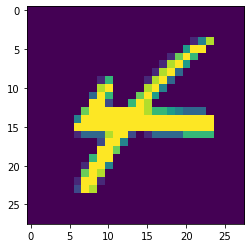

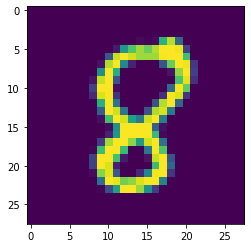

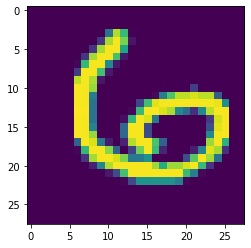

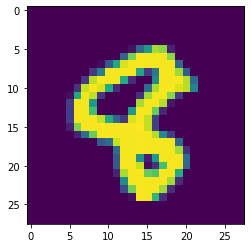

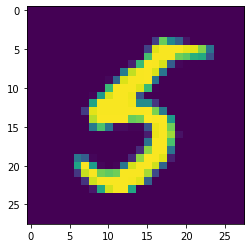

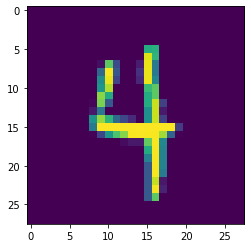

In [ ]:
i = 0
for data in trainset:
    plt.imshow(data[0][0].view(28, 28))
    plt.show()
    if(i == 5):
        break
    i += 1